## libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import pickle


In [28]:
df = pd.read_csv("ObesityDataSet.csv")

In [29]:
df

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad
0,21.000000,Female,1.620000,64.000000,no,no,2.0,3.0,no,no,2.000000,yes,0.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
1,21.000000,Female,1.520000,56.000000,Sometimes,no,3.0,3.0,yes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation,Normal_Weight
2,23.000000,Male,1.800000,77.000000,Frequently,no,2.0,3.0,no,no,2.000000,yes,2.000000,1.000000,Sometimes,Public_Transportation,Normal_Weight
3,27.000000,Male,1.800000,87.000000,Frequently,no,3.0,3.0,no,no,2.000000,no,2.000000,0.000000,Sometimes,Walking,Overweight_Level_I
4,22.000000,Male,1.780000,89.800000,Sometimes,no,2.0,1.0,no,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,20.976842,Female,1.710730,131.408528,Sometimes,yes,3.0,3.0,no,no,1.728139,yes,1.676269,0.906247,Sometimes,Public_Transportation,Obesity_Type_III
2107,21.982942,Female,1.748584,133.742943,Sometimes,yes,3.0,3.0,no,no,2.005130,yes,1.341390,0.599270,Sometimes,Public_Transportation,Obesity_Type_III
2108,22.524036,Female,1.752206,133.689352,Sometimes,yes,3.0,3.0,no,no,2.054193,yes,1.414209,0.646288,Sometimes,Public_Transportation,Obesity_Type_III
2109,24.361936,Female,1.739450,133.346641,Sometimes,yes,3.0,3.0,no,no,2.852339,yes,1.139107,0.586035,Sometimes,Public_Transportation,Obesity_Type_III


## preprocessing

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2077 non-null   float64
 3   Weight                          2064 non-null   float64
 4   CALC                            2073 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2089 non-null   float64
 7   NCP                             2086 non-null   float64
 8   SCC                             2087 non-null   object 
 9   SMOKE                           2066 non-null   object 
 10  CH2O                            2082 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             20

In [7]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2077.000000,2064.000000,2089.000000,2086.000000,2082.000000,2099.000000,2082.000000
mean,24.312600,1.701919,86.912477,2.419148,2.688919,2.006736,1.005605,0.662752
std,6.345968,0.093403,26.003685,0.534353,0.778884,0.612293,0.850297,0.609735
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,66.500000,2.000000,2.671177,1.582010,0.119641,0.000000
50%,22.777890,1.700996,83.015501,2.388168,3.000000,2.000000,1.000000,0.630866
75%,26.000000,1.768834,108.003151,3.000000,3.000000,2.474422,1.652394,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [8]:
df.nunique()

Age                               1402
Gender                               2
Height                            1543
Weight                            1502
CALC                                 4
FAVC                                 2
FCVC                               810
NCP                                612
SCC                                  2
SMOKE                                2
CH2O                              1249
family_history_with_overweight       2
FAF                               1184
TUE                               1116
CAEC                                 4
MTRANS                               5
NObeyesdad                           7
dtype: int64

In [9]:
df.shape

(2111, 17)

In [30]:
df.duplicated().sum()

np.int64(21)

In [11]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [12]:
df.isnull().sum()

Age                                0
Gender                             0
Height                            32
Weight                            47
CALC                              38
FAVC                               0
FCVC                              20
NCP                               25
SCC                               24
SMOKE                             45
CH2O                              29
family_history_with_overweight     0
FAF                               12
TUE                               25
CAEC                              34
MTRANS                             0
NObeyesdad                         0
dtype: int64

In [13]:
numerical_columns = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']
categorical_columns = ['Gender', 'CALC', 'FAVC', 'SCC', 'SMOKE','family_history_with_overweight', 'CAEC', 'MTRANS', 'NObeyesdad']

In [14]:
for col in numerical_columns:
    df[col] = df[col].fillna(df[col].median())

In [15]:
for col in categorical_columns:
    df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
df.isnull().sum()

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

## EDA

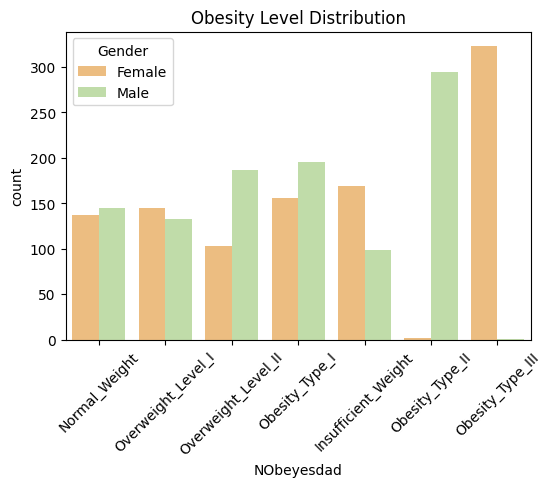

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='NObeyesdad', data=df, hue='Gender',  palette='Spectral')
plt.title('Obesity Level Distribution')
plt.xticks(rotation=45)
plt.show()


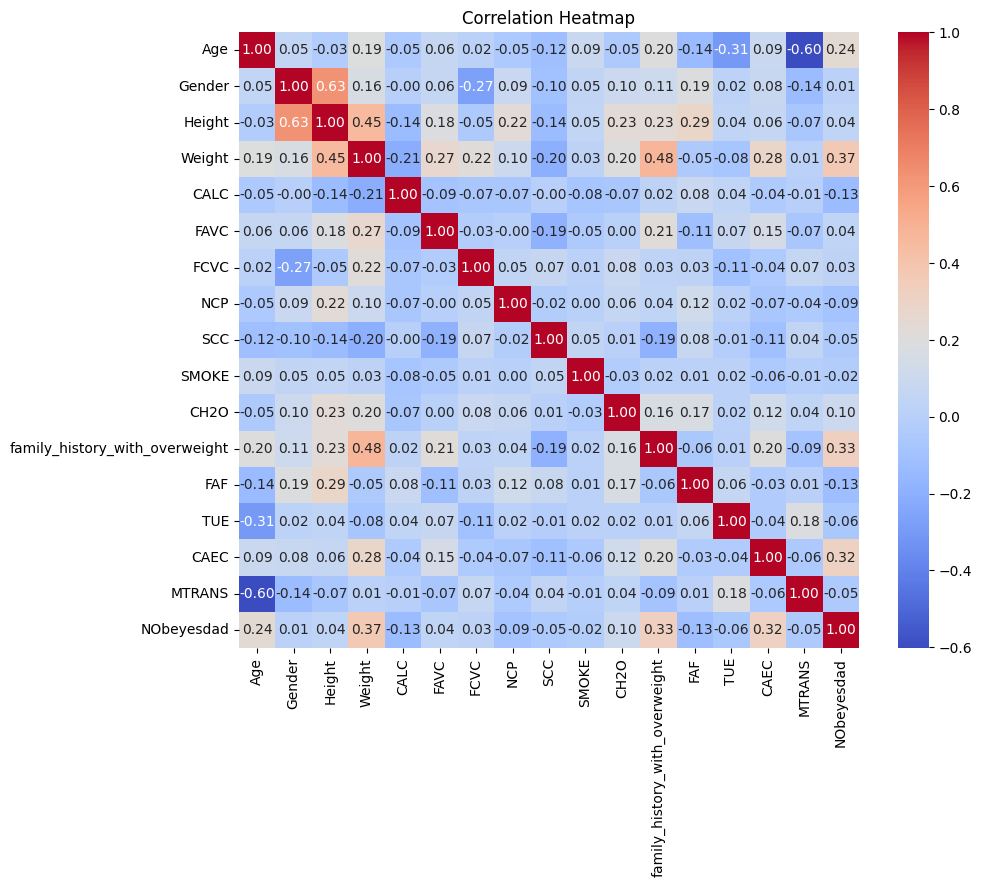

In [18]:
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


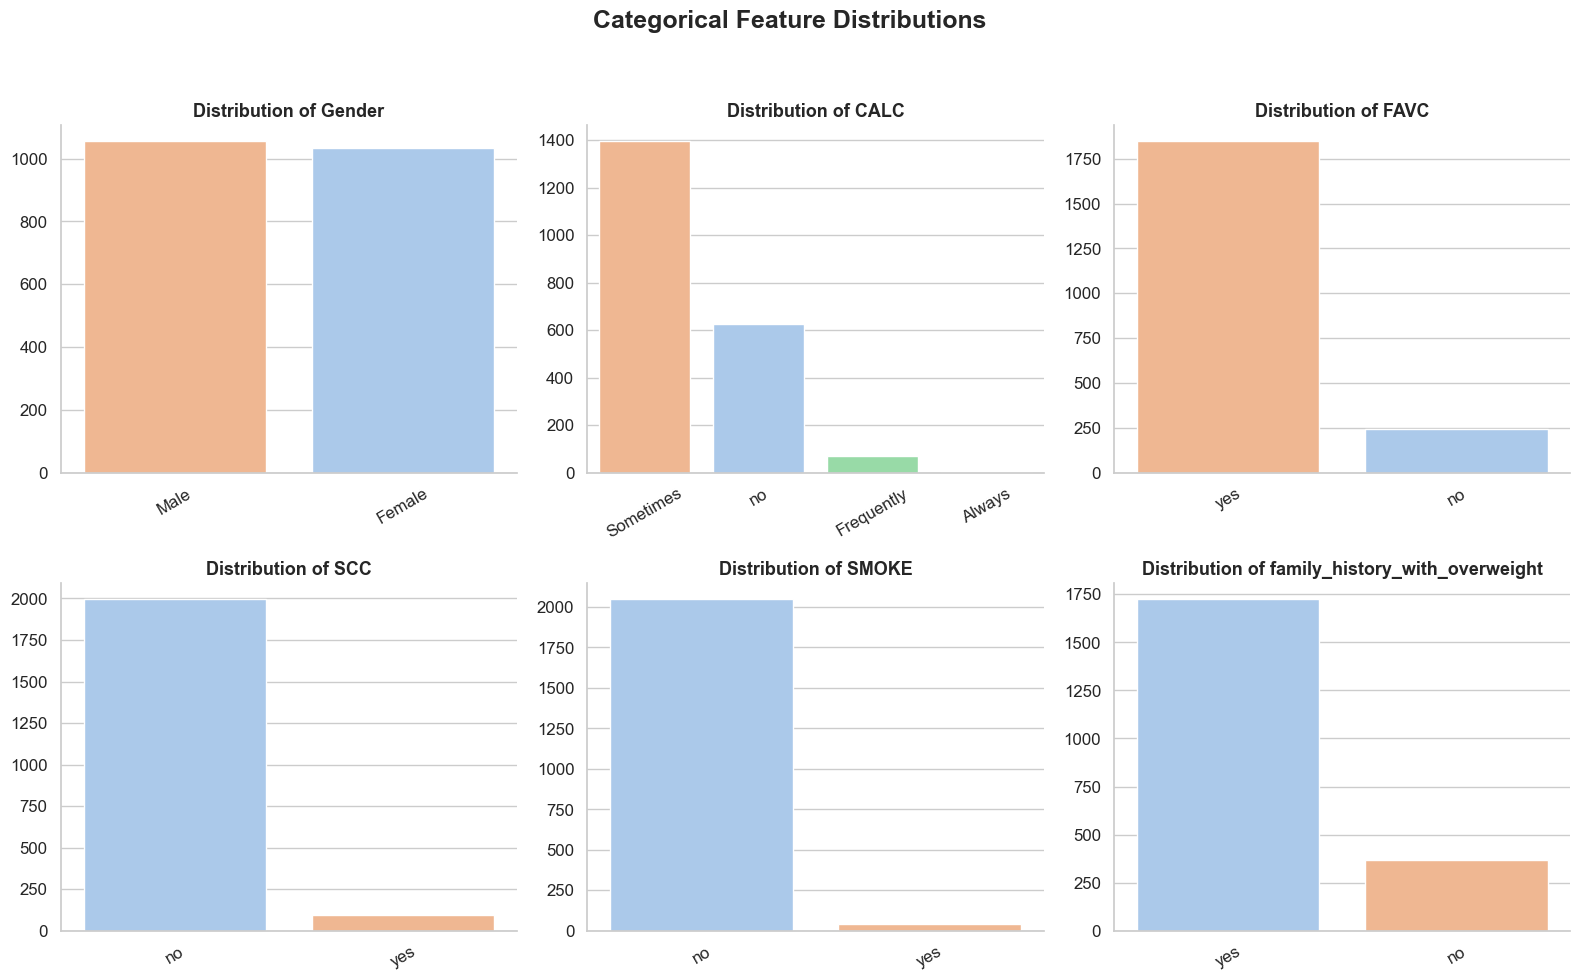

In [19]:
sns.set(style="whitegrid", font_scale=1.1)

cat_cols = [col for col in df.select_dtypes(include='object') if col != 'NObeyesdad']
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
for ax, col in zip(axes.flat, cat_cols[:6]):
    sns.countplot(data=df, x=col, hue=col, palette="pastel", order=df[col].value_counts().index, legend=False, ax=ax)
    ax.set_title(f'Distribution of {col}', fontsize=13, fontweight='bold')
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=30)
    sns.despine(ax=ax)
fig.suptitle("Categorical Feature Distributions", fontsize=18, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()



## Encoding

In [20]:
df_encoded = df.copy()
label_encoder = LabelEncoder()
df_encoded['NObeyesdad_encoded'] = label_encoder.fit_transform(df_encoded['NObeyesdad'])
categorical_cols = df_encoded.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('NObeyesdad')

for col in categorical_cols:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])
df_encoded.head()

,Age,Gender,Height,Weight,CALC,FAVC,FCVC,NCP,SCC,SMOKE,CH2O,family_history_with_overweight,FAF,TUE,CAEC,MTRANS,NObeyesdad,NObeyesdad_encoded
0,21.0,0,1.62,64.0,3,0,2.0,3.0,0,0,2.0,1,0.0,1.0,2,3,Normal_Weight,1
1,21.0,0,1.52,56.0,2,0,3.0,3.0,1,1,3.0,1,3.0,0.0,2,3,Normal_Weight,1
2,23.0,1,1.80,77.0,1,0,2.0,3.0,0,0,2.0,1,2.0,1.0,2,3,Normal_Weight,1
3,27.0,1,1.80,87.0,1,0,3.0,3.0,0,0,2.0,0,2.0,0.0,2,4,Overweight_Level_I,5
4,22.0,1,1.78,89.8,2,0,2.0,1.0,0,0,2.0,0,0.0,0.0,2,3,Overweight_Level_II,6


In [21]:
X = df_encoded.drop(['NObeyesdad', 'NObeyesdad_encoded'], axis=1)
y = df_encoded['NObeyesdad_encoded']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training data : {X_train.shape}, Testing data : {X_test.shape}")

Training data : (1672, 16), Testing data : (418, 16)


In [23]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.22%


In [24]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.84      0.93      0.88        56
           2       0.97      0.97      0.97        70
           3       1.00      0.98      0.99        59
           4       1.00      0.98      0.99        65
           5       0.88      0.91      0.89        56
           6       0.98      0.91      0.95        58

    accuracy                           0.95       418
   macro avg       0.95      0.95      0.95       418
weighted avg       0.95      0.95      0.95       418



In [25]:
import joblib
joblib.dump(rf_model, "final_obesity_model.pkl")


['final_obesity_model.pkl']

In [26]:
import tkinter as tk
from tkinter import messagebox
import joblib
import numpy as np

# Load the model
model = joblib.load("final_obesity_model.pkl")

# Define the selected input features
features = ["Age", "Height (m)", "Weight (kg)", "FAF (Physical Activity)"]

# Prediction and GUI logic
def predict():
    try:
        input_data = [float(entry.get()) for entry in entries]
        
        # Prepare full input vector with dummy/default values for remaining features
        full_input = np.zeros((1, 16))  # Assuming the model expects 16 features
        
        # Map the selected inputs to correct indices in full feature vector
        # Let's assume these map to indices: Age=1, Height=2, Weight=3, FAF=12
        full_input[0, 1] = input_data[0]   # Age
        full_input[0, 2] = input_data[1]   # Height
        full_input[0, 3] = input_data[2]   # Weight
        full_input[0, 12] = input_data[3]  # FAF
        
        prediction = model.predict(full_input)[0]

        # Map prediction to label
        analysis = {
            0: "Underweight",
            1: "Normal Weight",
            2: "Overweight",
            3: "Obese Type I",
            4: "Obese Type II",
            5: "Obese Type III"
        }
        result = analysis.get(prediction, "Unknown Category")
        messagebox.showinfo("Prediction Result", f"Obesity Level: {result}")
    except Exception as e:
        messagebox.showerror("Error", f"Invalid input: {e}")

# GUI layout
root = tk.Tk()
root.title("Obesity Prediction (Simplified)")

entries = []
for feature in features:
    row = tk.Frame(root)
    label = tk.Label(row, width=30, text=feature, anchor='w')
    entry = tk.Entry(row)
    row.pack(side=tk.TOP, fill=tk.X, padx=5, pady=5)
    label.pack(side=tk.LEFT)
    entry.pack(side=tk.RIGHT, expand=tk.YES, fill=tk.X)
    entries.append(entry)

predict_btn = tk.Button(root, text="Predict Obesity Level", command=predict)
predict_btn.pack(pady=10)

root.mainloop()

c:\Users\Maham Aziz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\Maham Aziz\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
